In [1]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

import tensorboard
import matplotlib.pyplot as plt

import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

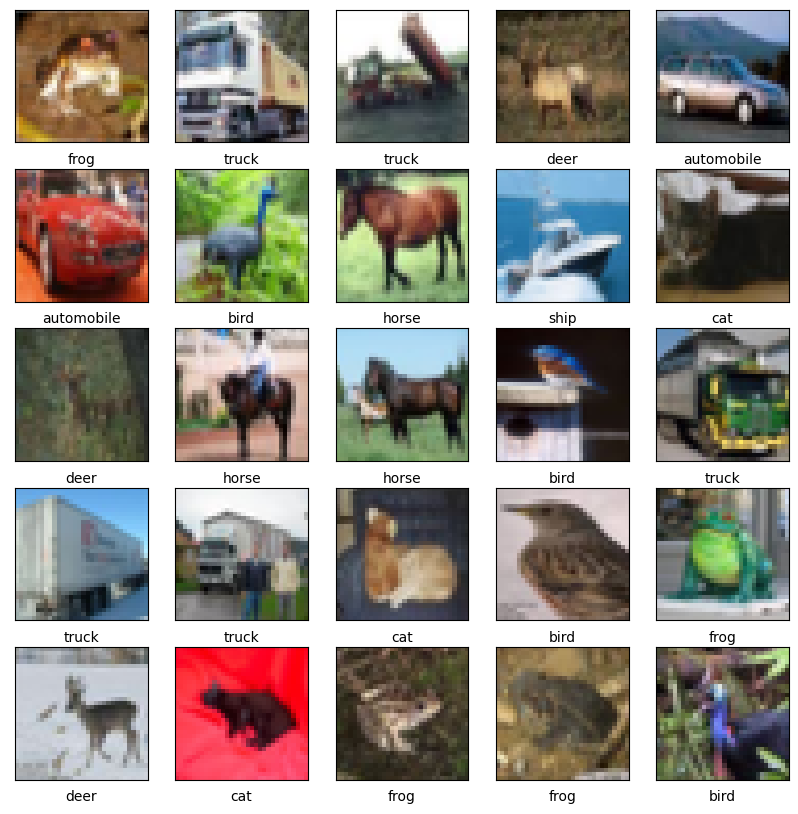

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
print(train_labels[100])

tf.keras.utils.to_categorical(train_labels)[100]

[8]


array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

TEST WITH DIFFERENT LEARNING RATE

In [16]:
learn_rate = [0.001, 0.01, 0.05]
for i in range(0,3):
    for b in range(6,7):
        print("Set learning rate: ",learn_rate[i], "with batch size: ",2**b)
        opt = tf.keras.optimizers.Adam(learning_rate=learn_rate[i])

        cnn_model = tf.keras.models.Sequential()
        cnn_model.add(tf.keras.layers.Conv2D(6, (5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3)))
        cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
        cnn_model.add(tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), padding='same', activation='relu'))
        cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
        cnn_model.add(tf.keras.layers.Conv2D(120, (5, 5), padding='same', activation='relu'))
        cnn_model.add(tf.keras.layers.Flatten())



        cnn_model.add(tf.keras.layers.Dense(84))
        cnn_model.add(tf.keras.layers.Activation('softmax'))
        cnn_model.summary()

        cnn_model.compile(optimizer=opt,
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

        # Define the Keras TensorBoard callback.
        logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
        tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
        
        model = cnn_model
        #Train the model
        model.fit(
            train_images, 
            train_labels, 
            epochs=25,
            batch_size=2**b,
            validation_data=(test_images, test_labels),
            callbacks=[tensorboard_callback])

        # Evaluate
        score = model.evaluate(test_images, test_labels)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])


Set learning rate:  0.001 with batch size:  64
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 16, 16, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 16, 16, 16)        2416      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 8, 8, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 8, 8, 120)         48120     
                                                                 
 flatt

TEST WITH DIFFERENT BATCH SIZE: 32, 64, 128

In [5]:
learn_rate = [0.001, 0.01, 0.05]
for i in range(0,1):
    for b in range(5,8):
        print("Set learning rate: ",learn_rate[i], "with batch size: ",2**b)
        opt = tf.keras.optimizers.Adam(learning_rate=learn_rate[i])

        cnn_model = tf.keras.models.Sequential()
        cnn_model.add(tf.keras.layers.Conv2D(6, (5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3)))
        cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
        cnn_model.add(tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), padding='same', activation='relu'))
        cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
        cnn_model.add(tf.keras.layers.Conv2D(120, (5, 5), padding='same', activation='relu'))
        cnn_model.add(tf.keras.layers.Flatten())



        cnn_model.add(tf.keras.layers.Dense(84))
        cnn_model.add(tf.keras.layers.Activation('softmax'))
        cnn_model.summary()

        cnn_model.compile(optimizer=opt,
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

        # Define the Keras TensorBoard callback.
        logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
        tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
        
        model = cnn_model
        #Train the model
        model.fit(
            train_images, 
            train_labels, 
            epochs=25,
            batch_size=2**b,
            validation_data=(test_images, test_labels),
            callbacks=[tensorboard_callback])

        # Evaluate
        score = model.evaluate(test_images, test_labels)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])


Set learning rate:  0.001 with batch size:  32
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 120)         48120     
                                                                 
 flatten 

c:\Users\hieut\.conda\envs\tf\lib\site-packages\tensorflow\python\util\dispatch.py:1176: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 9s 4ms/step - loss: 1.5452 - accuracy: 0.4453 - val_loss: 1.2895 - val_accuracy: 0.5344
Epoch 2/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1498 - accuracy: 0.5914 - val_loss: 1.0710 - val_accuracy: 0.6201
Epoch 3/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9650 - accuracy: 0.6624 - val_loss: 1.0039 - val_accuracy: 0.6474
Epoch 4/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8427 - accuracy: 0.7065 - val_loss: 0.9647 - val_accuracy: 0.6676
Epoch 5/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7368 - accuracy: 0.7419 - val_loss: 0.9710 - val_accuracy: 0.6661
Epoch 6/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6332 - accuracy: 0.7789 - val_loss: 1.0064 - val_accuracy: 0.6736
Epoch 7/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5487 - accuracy: 0.8078 - val_loss: 1.0734 - val_accuracy: 0.6617
Epo

Optimizing parameters:

Similar Feed forward Neural Network with number of neurons in dense layer = number of filters in convolutional layers

In [6]:
learn_rate = [0.001, 0.01, 0.05]
for i in range(0,1):
    for b in range(7,8):
        print("Set learning rate: ",learn_rate[i], "with batch size: ",2**b)
        opt = tf.keras.optimizers.Adam(learning_rate=learn_rate[i])

        cnn_model = tf.keras.models.Sequential()
        cnn_model.add(tf.keras.layers.Dense(6,input_shape=(32, 32, 3), activation="relu"))
        cnn_model.add(tf.keras.layers.Dense(16, activation="relu"))
        cnn_model.add(tf.keras.layers.Dense(120, activation="relu"))
        cnn_model.add(tf.keras.layers.Flatten())

        cnn_model.add(tf.keras.layers.Dense(84))
        cnn_model.add(tf.keras.layers.Activation('softmax'))
        cnn_model.summary()

        cnn_model.compile(optimizer=opt,
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

        # Define the Keras TensorBoard callback.
        logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
        tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
        
        model = cnn_model
        #Train the model
        model.fit(
            train_images, 
            train_labels, 
            epochs=25,
            batch_size=2**b,
            validation_data=(test_images, test_labels),
            callbacks=[tensorboard_callback])

        # Evaluate
        score = model.evaluate(test_images, test_labels)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])


Set learning rate:  0.001 with batch size:  128
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32, 32, 6)         24        
                                                                 
 dense_4 (Dense)             (None, 32, 32, 16)        112       
                                                                 
 dense_5 (Dense)             (None, 32, 32, 120)       2040      
                                                                 
 flatten_3 (Flatten)         (None, 122880)            0         
                                                                 
 dense_6 (Dense)             (None, 84)                10322004  
                                                                 
 activation_3 (Activation)   (None, 84)                0         
                                                                 
Total 